In [1]:
import sys
sys.path.append('d:\\QUANT_GAME\\python_game\\factor\\factor_lab\\analyze_note')
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'current'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：电流因子(current)   
因子定义：电压因子/电阻因子   

时间窗口$\delta_t$内,有
- 电压因子：
  - 零电势（收益均值）
    $$
    ZeroVoltage_{t} = \frac{1}{\delta_t}\sum_{i=t-\delta_t+1}^t r_i
    $$
  - 电压因子
    $$
    Voltage_t = r_t - ZeroVoltage_{t}
    $$
    $$
    = r_t - \mu(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_t) 
    $$
    $$
    = r_t - \frac{1}{\delta_t}\sum_{i=t-\delta_t+1}^t r_i
    $$
- 电阻因子：
  - 定义1：窗口周期delta_t内收益r最大最小值之差的绝对值
  $$
  Resistance_t = |\max(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_t) - \min(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_t)|
  $$
  - 定义2：窗口周期delta_t内,收益r在t时刻的值到窗口周期内的最大值的比值，即回撤
  $$
  Resistance_t = r_t/\max(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_t) - 1
  $$
  - 定义3：窗口周期delta_t内,收益r的标准差
  $$
  Resistance_t = \sigma(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_t)
  $$

电流因子（默认电压定义为收益均值，电阻定义为收益标准差）：
  $$
  factor = \frac{Voltage_t}{Resistance_t}
  $$
  $$
  = \frac{r_t - \mu(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_t)}{\sigma(r_{t-\delta_t+1},r_{t-\delta_t+2},\cdots,r_t)}
  $$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : current
fields : ['close']
other_dIepend_factors : ['voltage', 'resistance']
calc_params : {'resistance_type': 'std', 'resistance_calc_price_or_returns': 'returns', 'voltage_calc_price_or_returns': 'returns', 'voltage_zero_elevation_type': 'mean', 'delta_period': 20}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-4.248510092153696, 4.248440272120627]
process_suggest_method : None


---

### 因子分析

In [6]:
note.get_data_for_analysis()

In [7]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

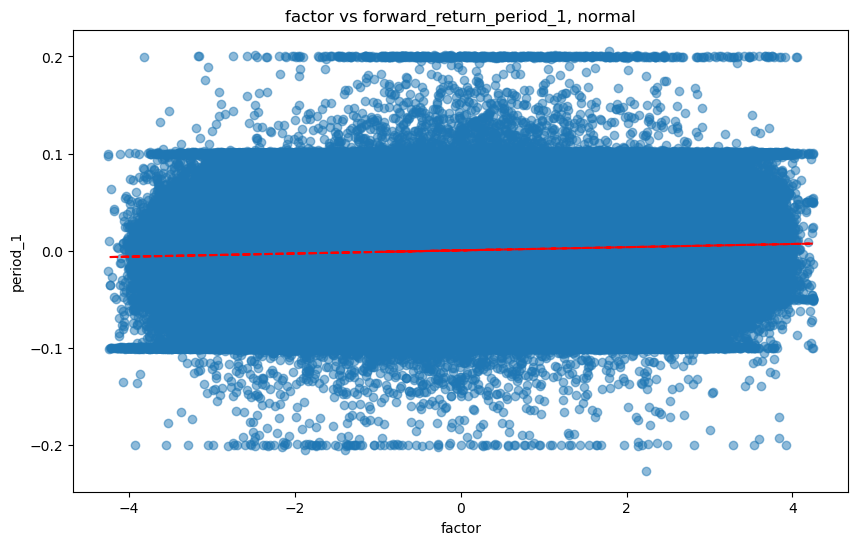

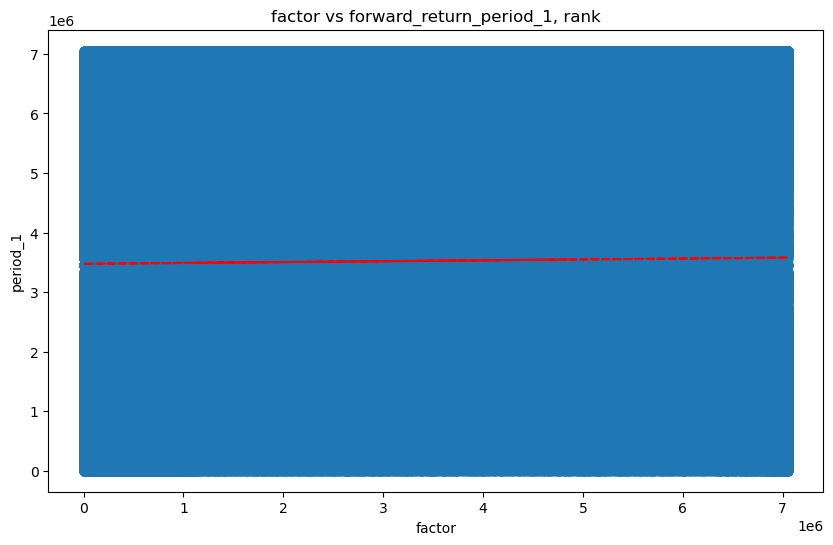

In [8]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

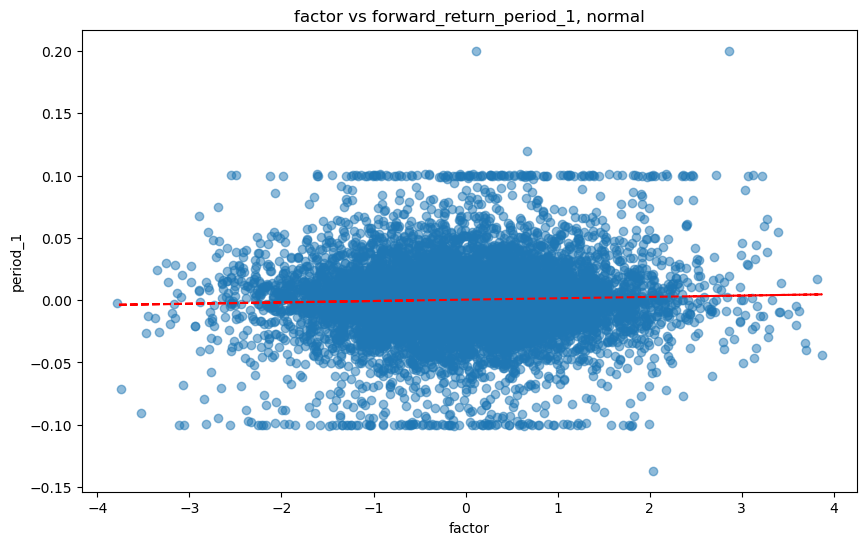

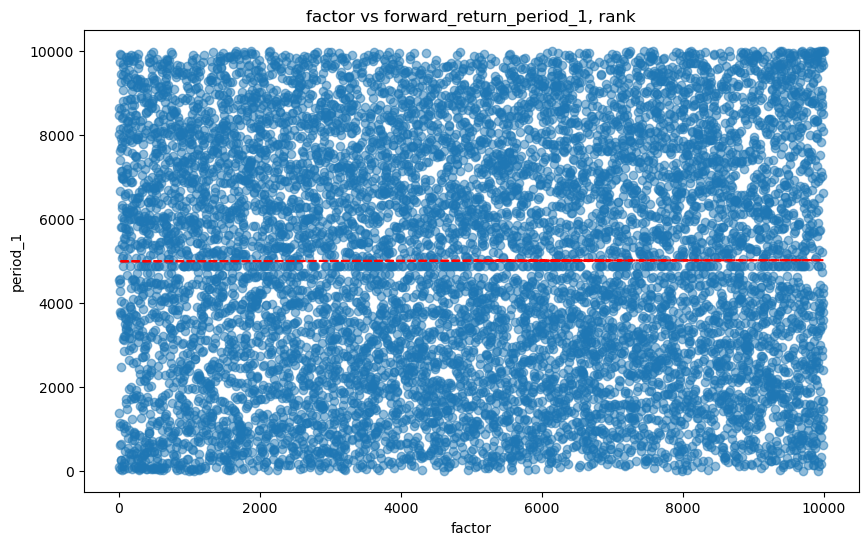

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

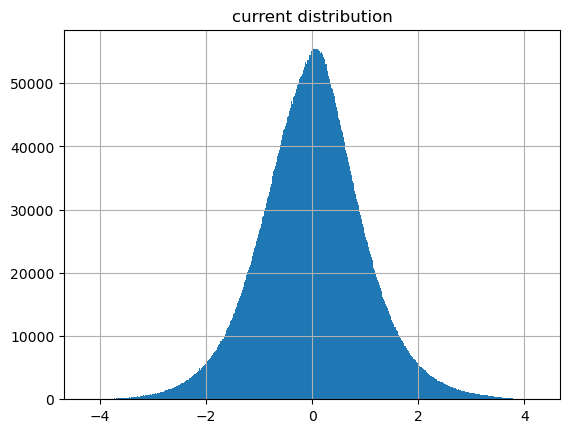

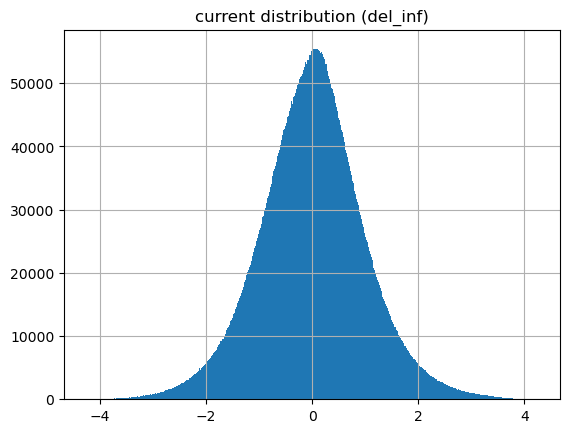

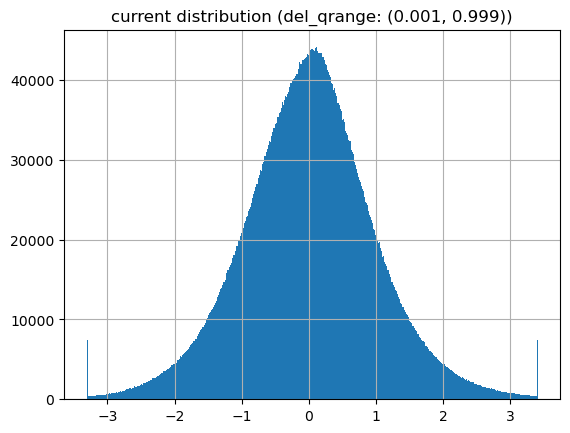

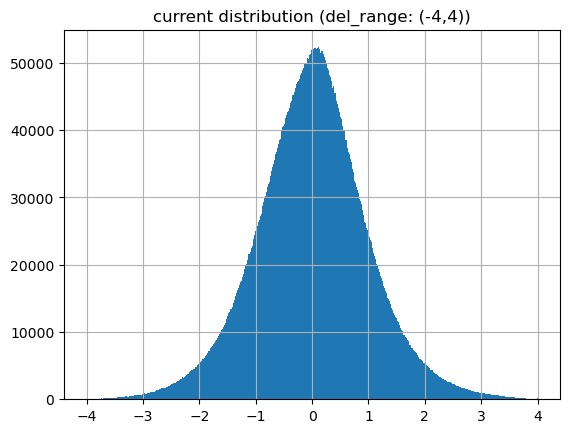

In [10]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.001,0.999))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-4,4))

---

#### IC

#### 打印因子ic分析结果

In [11]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
                       period_1  period_2  period_3  period_5  period_8  \
norm_ic_mean          0.046434  0.029663  0.026353  0.011694  0.013808   
norm_ic_std           0.112865  0.109616  0.107099  0.102049  0.093655   
norm_ic_0.02_percent  0.861257  0.837696  0.828721   0.81825  0.807405   
norm_ic_t                  NaN       NaN       NaN       NaN       NaN   
norm_ir               0.411415  0.270605  0.246059  0.114593  0.147435   
norm_abs_ic           0.054114  0.034669  0.034547  0.019506  0.018524   
rank_ic_mean          0.004337 -0.000425  0.002463  -0.00591  0.001629   
rank_ic_std           0.126986  0.122834  0.120075  0.116082  0.108477   
rank_ic_0.02_percent  0.869484  0.870232  0.860509  0.832087  0.842558   
rank_ic_t                  NaN       NaN       NaN       NaN       NaN   
rank_ir               0.034153 -0.003464  0.020512 -0.050912  0.015014   
rank_abs_ic           0.014761  0.010906  0.018458  0.003334  0.004252   

                    

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

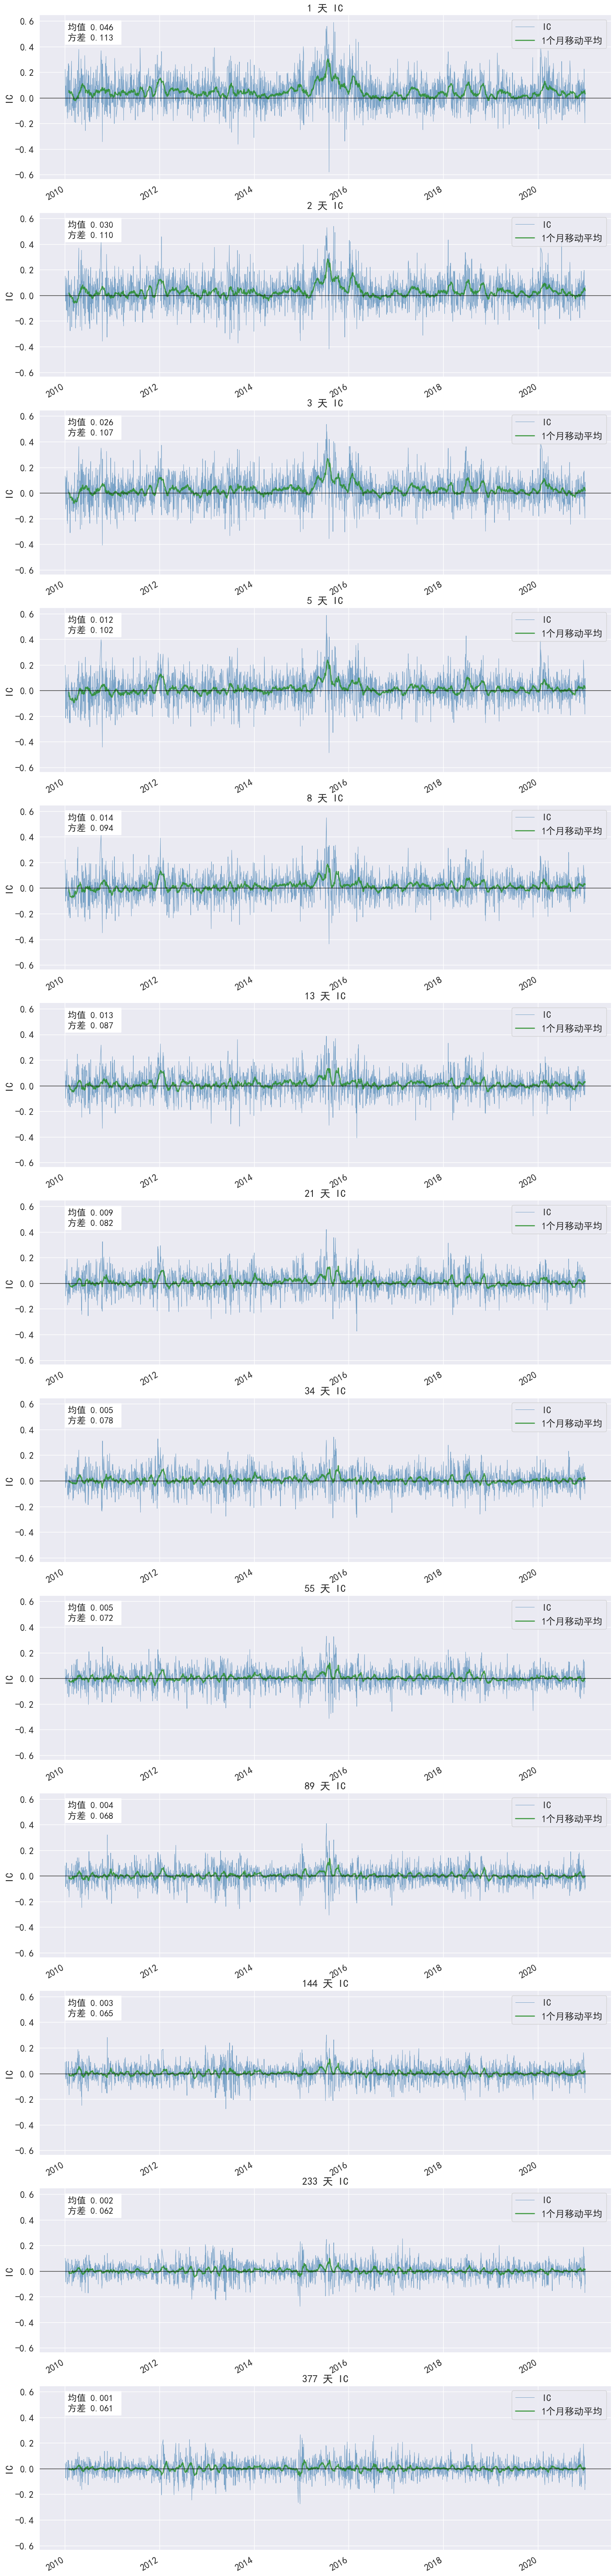

In [12]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

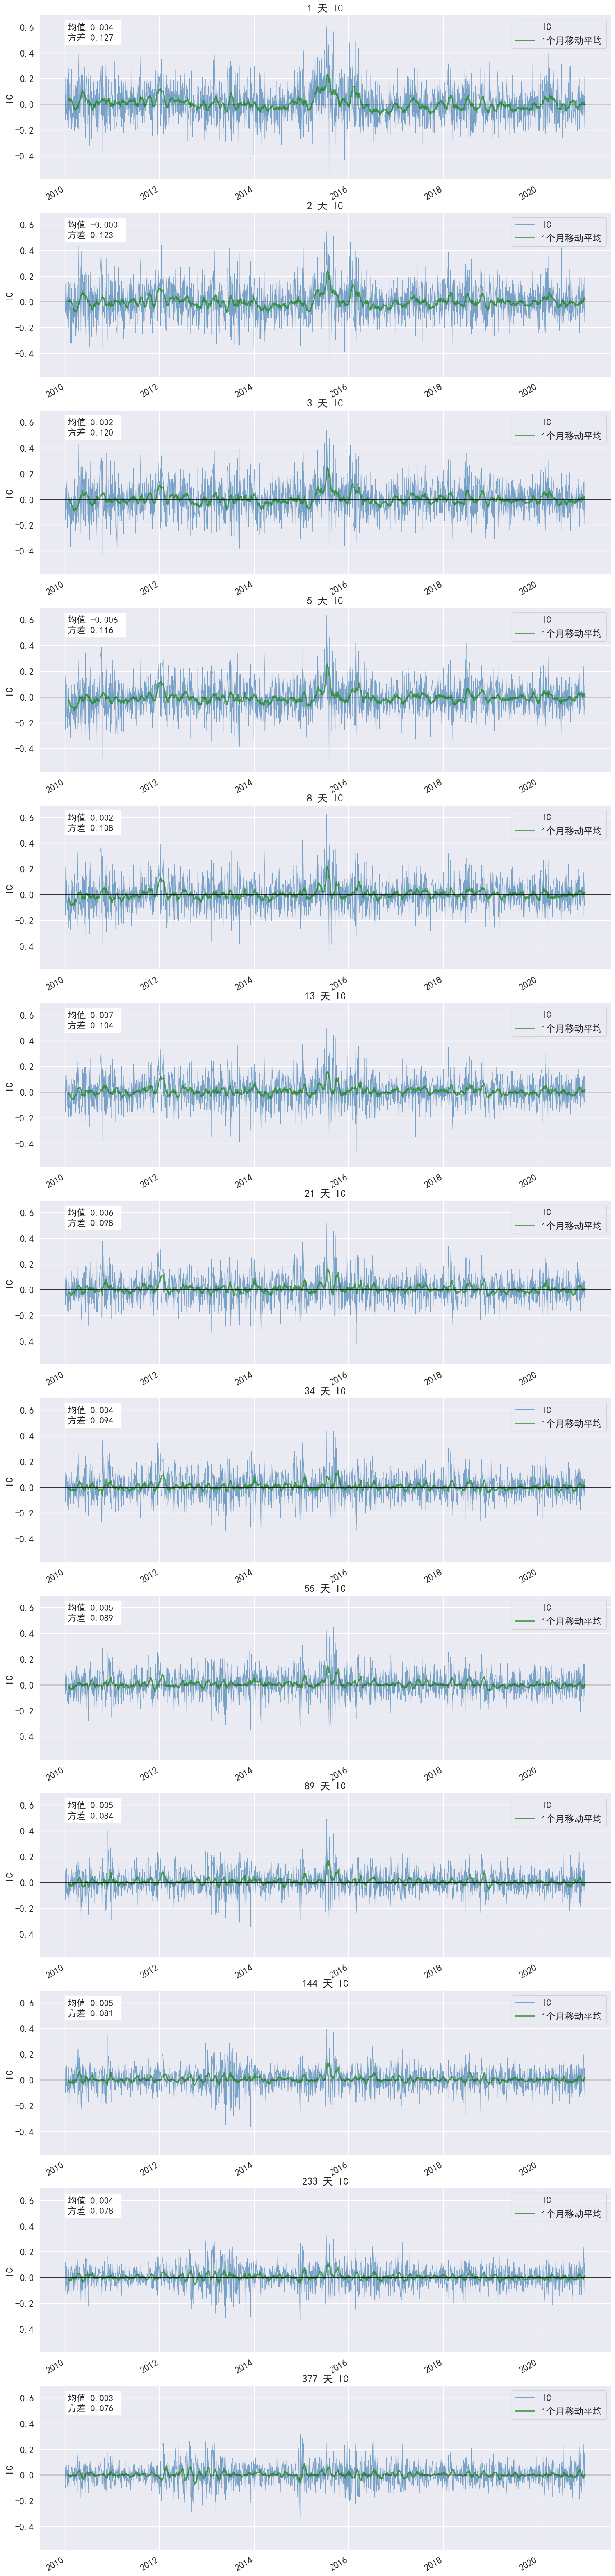

In [13]:
zy_fa.plot_rank_ic_ts()